In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline


In [ ]:
iris = datasets.load_iris()
print (iris.data)

In [ ]:

print (iris.target_names)

In [ ]:
print (iris.target)

In [ ]:

x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [ ]:

x.head()

In [ ]:
y.head()

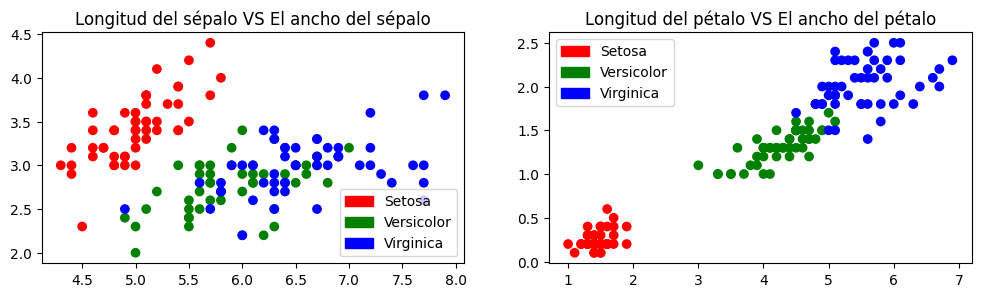

In [31]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Longitud del sépalo VS El ancho del sépalo')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Longitud del pétalo VS El ancho del pétalo')
plt.legend(handles=[red_patch, green_patch, blue_patch])


In [ ]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)


In [ ]:
print (iris_k_mean_model.labels_)


In [ ]:
print (iris_k_mean_model.cluster_centers_)

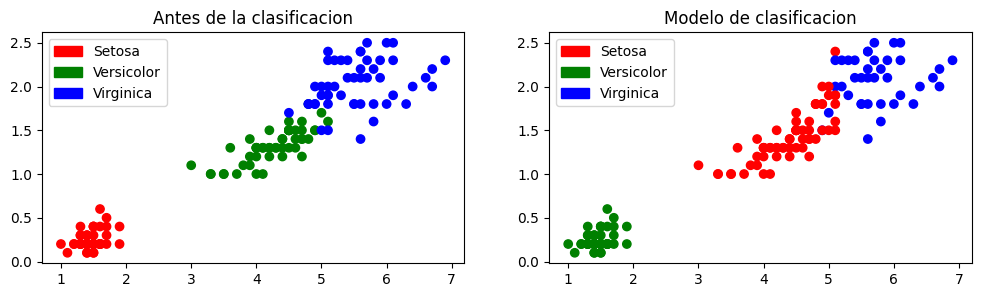

In [32]:
plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Antes de la clasificacion')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Modelo de clasificacion")
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [ ]:
sm.accuracy_score(predictedY, y['Target'])

In [ ]:
sm.confusion_matrix(predictedY, y['Target'])